findfont: Font family ['Fangsong'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Fangsong'] not found. Falling back to DejaVu Sans.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Glyph 39033 (\N{CJK UNIFIED IDEOGRAPH-9879}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Glyph 25968 (\N{CJK UNIFIED

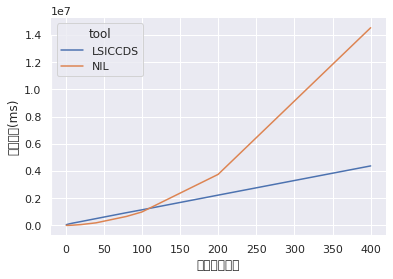

In [36]:
# draw the change of overall test speed
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
speed_dict = {
    "tool": [],
    "repo_num": [],
    "time": []
}
with open("test_speed_middle_results/Compare_time", "r") as f:
    time_infos = f.read().strip().split("\n")
    for info in time_infos:
        repo_num, LSICCDS_info, NIL_info = info.split(" ")
        LSICCDS_time = int(LSICCDS_info[8:].split(",")[0])
        NIL_time = int(NIL_info[4:].split(",")[0])
        repo_num = int(repo_num)
        speed_dict["tool"].append("LSICCDS")
        speed_dict["repo_num"].append(repo_num)
        speed_dict["time"].append(LSICCDS_time)
        speed_dict["tool"].append("NIL")
        speed_dict["repo_num"].append(repo_num)
        speed_dict["time"].append(NIL_time)
speed_df = pd.DataFrame.from_dict(speed_dict)
sns_plot = sns.lineplot(data=speed_df, x="repo_num", y="time", hue="tool", color='#366b7e')
sns.set(font='Fangsong')
# plt.xlabel("the number of repositories")
# plt.ylabel("time(ms)")
plt.xlabel("检测项目数量")
plt.ylabel("检测时间(ms)")
plt.rcParams['font.sans-serif'] = ['Fangsong']
plt.rcParams['axes.unicode_minus'] = False
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=True)
sns_plot.figure.savefig("test_speed_middle_results/compare_speed.pdf", bbox_inches='tight')


/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Glyph 39033 (\N{CJK UNIFIED IDEOGRAPH-9879}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
/home/zxh/anaconda3/envs/LSICCDS_server/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserW

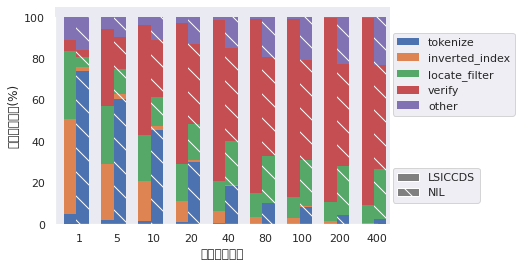

In [38]:
# show how time composition changes
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
speed_dict = {
    "tool": [],
    "repo_num": [],
    "time_type": [],
    "time": []
}
time_types = ["tokenize", "inverted_index", "locate_filter", "verify", "other"] # columns
repo_nums = [] # indexes
with open("test_speed_middle_results/Compare_time", "r") as f:
    time_infos = f.read().strip().split("\n")
    for info in time_infos:
        repo_num, LSICCDS_info, NIL_info = info.split(" ")
        repo_nums.append(repo_num)

with open("test_speed_middle_results/Compare_time", "r") as f:
    LSICCDS_array = []
    NIL_array = []
    time_infos = f.read().strip().split("\n")
    for info in time_infos:
        repo_num, LSICCDS_info, NIL_info = info.split(" ")
        LSICCDS_time, LSICCDS_tokenize, LSICCDS_inverted_index, LSICCDS_location_filter, LSICCDS_verify, LSICCDS_other, LSICCDS_verify_count, LSICCDS_tokenize_count = LSICCDS_info[8:].split(",")
        LSICCDS_tokenize = int(LSICCDS_tokenize) * 100 / int(LSICCDS_time)
        LSICCDS_inverted_index = int(LSICCDS_inverted_index) * 100 / int(LSICCDS_time)
        LSICCDS_location_filter = int(LSICCDS_location_filter) * 100 / int(LSICCDS_time)
        LSICCDS_verify = int(LSICCDS_verify) * 100 / int(LSICCDS_time)
        LSICCDS_other = int(LSICCDS_other) * 100 / int(LSICCDS_time)
        LSICCDS_array.append([LSICCDS_tokenize, LSICCDS_inverted_index, LSICCDS_location_filter, LSICCDS_verify, LSICCDS_other])

        NIL_time, NIL_tokenize, NIL_inverted_index, NIL_location, NIL_filter, NIL_verify, NIL_other, NIL_verify_count, NIL_tokenize_count = NIL_info[4:].split(",")
        NIL_tokenize = int(NIL_tokenize) * 100 / int(NIL_time)
        NIL_inverted_index = int(NIL_inverted_index) * 100 / int(NIL_time)
        NIL_location_filter = (int(NIL_location) + int(NIL_filter)) * 100 / int(NIL_time)
        NIL_verify = int(NIL_verify) * 100 / int(NIL_time)
        NIL_other = int(NIL_other) * 100 / int(NIL_time)
        NIL_array.append([NIL_tokenize, NIL_inverted_index, NIL_location_filter, NIL_verify, NIL_other])

LSICCDS_df = pd.DataFrame(np.array(LSICCDS_array), index=repo_nums, columns=time_types)
NIL_df = pd.DataFrame(np.array(NIL_array), index=repo_nums, columns=time_types)


import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="\\", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)
    # axe.set_xlabel("the number of repositories")
    # axe.set_ylabel("time(%)")
    sns.set(font='Fangsong')
    axe.set_xlabel("检测项目数量")
    axe.set_ylabel("检测时间占比(%)")
    plt.rcParams['font.sans-serif'] = ['Fangsong']
    plt.rcParams['axes.unicode_minus'] = False

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

# Then, just call :
sns_plot = plot_clustered_stacked([LSICCDS_df, NIL_df],["LSICCDS", "NIL"], title="")

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=True)
sns_plot.figure.savefig("test_speed_middle_results/time_ratio.pdf", bbox_inches='tight')
